In [10]:
from func_def import *
df = pd.read_csv('data_processed.csv').reset_index(drop=True)
df.tail(3)

,date,result,fighter,opponent,title,method,fight_time,rounds,f_rev,f_ctrl,f_win_perc,f_win_streak,o_rev,o_ctrl,o_win_perc,o_win_streak,f_td%,f_sig_str%,o_td%,o_sig_str%,f_sub_att,o_sub_att,f_total_str_lnd,f_total_str_att,f_head_str_lnd,f_head_str_att,f_body_str_lnd,f_body_str_att,f_leg_str_lnd,f_leg_str_att,f_distance_str_lnd,f_distance_str_att,f_clinch_str_lnd,f_clinch_str_att,f_ground_str_lnd,f_ground_str_att,o_total_str_lnd,o_total_str_att,o_head_str_lnd,o_head_str_att,o_body_str_lnd,o_body_str_att,o_leg_str_lnd,o_leg_str_att,o_distance_str_lnd,o_distance_str_att,o_clinch_str_lnd,o_clinch_str_att,o_ground_str_lnd,o_ground_str_att
7015,1999-07-16,W,Paul Jone,Flavio Luiz Mour,Middleweight Bout,Submission,20.33,3,1,3.95,0.0,0,0,0.23,0.0,0,NaN,0.60,NaN,0.50,2,0,60,74,20,34,1,1,0,0,0,2,0,0,21,33,15,18,1,2,0,0,0,0,1,1,0,0,0,1
7016,1999-07-16,L,Tim Lajcik,Tsuyoshi Kohsaka,Heavyweight Bout,KO/TKO,25.00,3,0,7.00,0.0,0,1,1.25,0.0,0,NaN,0.38,0.0,0.78,0,3,43,71,10,29,2,2,0,0,0,6,1,2,11,23,73,77,7,7,2,2,2,5,4,7,0,0,7,7
7017,1999-07-16,L,Royce Alge,Eugene Jackson,Middleweight Bout,KO/TKO,5.32,3,0,2.57,0.0,0,0,0.33,0.0,0,0.25,0.42,NaN,0.45,0,1,12,27,11,26,0,0,0,0,0,7,3,4,8,15,27,52,15,40,6,6,0,0,11,34,5,7,5,5


R^2 = 0.8058480644084463


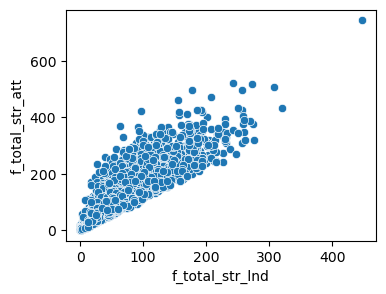

0.8058480644084463

In [11]:
# Feature correlation with one another 
get_correlation(x1='f_total_str_lnd',x2='f_total_str_att',data=df,visualize=True)

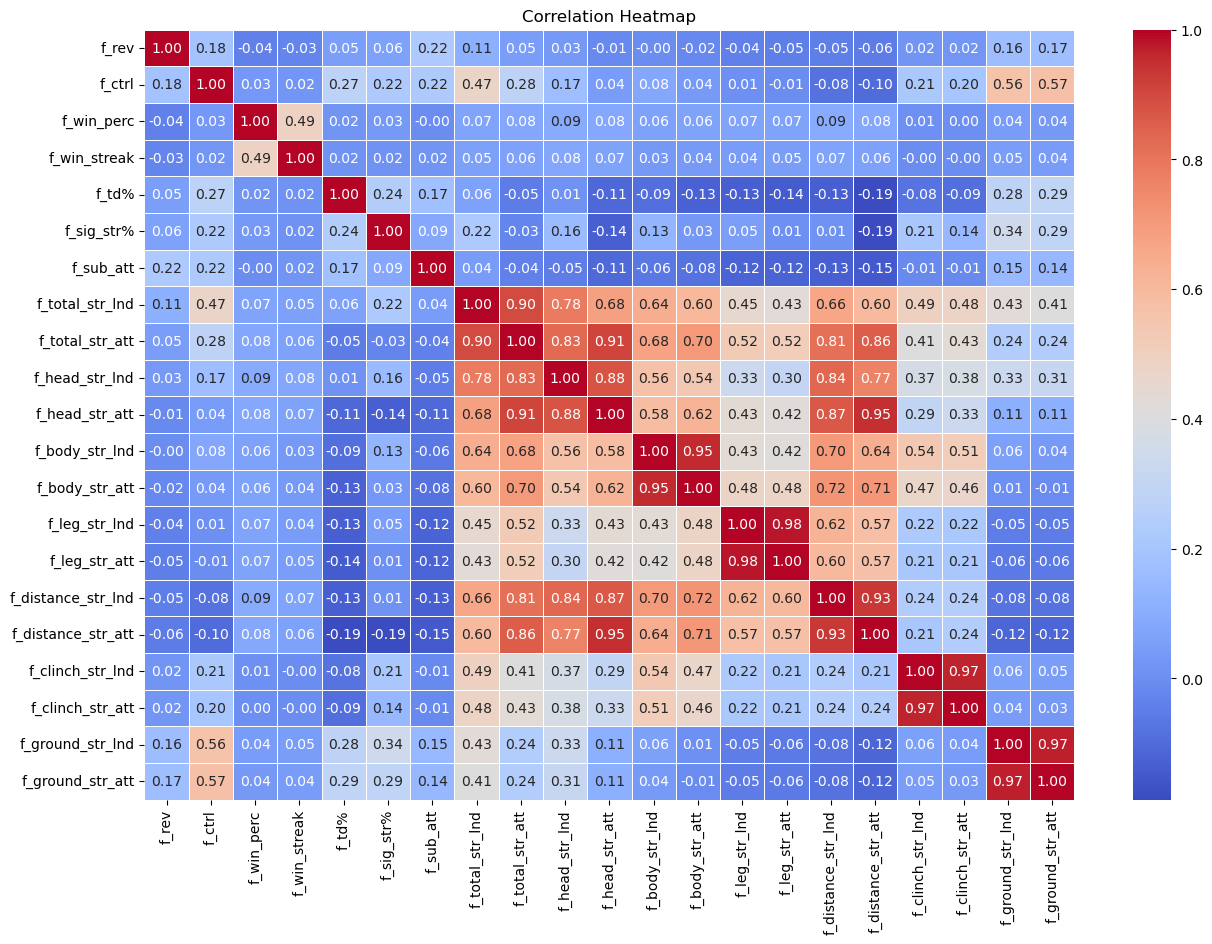

In [12]:
# Test features correlation - drop duplicated features:
correlation_matrix = df[[item for item in df.columns if 'f_' in item]].corr()

# Create a heatmap
plt.figure(figsize=(15, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Heatmap')
plt.show()

In [13]:
# Test features correlation - drop duplicated features:
corr= pd.DataFrame(columns=['x1','x1_p_value','x2','x2_p_value','r2'])

for x1 in tqdm([item for item in df.columns if 'f_' in item]):
    for x2 in [item for item in df.columns if 'f_' in item]:
            if x2 != x1:
                corr.loc[len(corr)] = {'x1':x1,'x1_p_value':feature_significance(data=df,column=x1,y='result'),
                                       'x2':x2,'x2_p_value':feature_significance(data=df,column=x2,y='result'),
                                       'r2':get_correlation(data=df,x1=x1,x2=x2)}

corr            

100%|██████████| 21/21 [00:08<00:00,  2.47it/s]


,x1,x1_p_value,x2,x2_p_value,r2
0,f_rev,2.493191e-02,f_ctrl,2.398193e-139,0.034079
1,f_rev,2.493191e-02,f_win_perc,2.780108e-14,0.001854
2,f_rev,2.493191e-02,f_win_streak,2.423651e-07,0.000756
3,f_rev,2.493191e-02,f_td%,2.016292e-83,0.002523
4,f_rev,2.493191e-02,f_sig_str%,5.185757e-197,0.003586
...,...,...,...,...,...
415,f_ground_str_att,3.649616e-187,f_distance_str_lnd,4.709340e-28,0.007080
416,f_ground_str_att,3.649616e-187,f_distance_str_att,9.227014e-07,0.013301
417,f_ground_str_att,3.649616e-187,f_clinch_str_lnd,8.450903e-33,0.002100
418,f_ground_str_att,3.649616e-187,f_clinch_str_att,1.922168e-24,0.001224


In [16]:
# Drop high correlated features - include more significant features (smaller p_value):
ALPHA = 0.05
MIN_CORRELATION_REQUIRED = 0.9

EXCLUDE_FEATURES = [item[2:] for item in corr[(corr.r2 > MIN_CORRELATION_REQUIRED)&(corr.x1_p_value > corr.x2_p_value)].x1.tolist()]
INCLUDE_FEATURES = list(set([item[2:] for item in df.columns if 'f_' in item]) - set(EXCLUDE_FEATURES))
print(f'Include Features: {INCLUDE_FEATURES}')

Include Features: ['clinch_str_lnd', 'distance_str_lnd', 'head_str_att', 'ground_str_lnd', 'sub_att', 'body_str_lnd', 'distance_str_att', 'ctrl', 'total_str_lnd', 'head_str_lnd', 'sig_str%', 'rev', 'td%', 'win_perc', 'total_str_att', 'leg_str_lnd', 'win_streak']


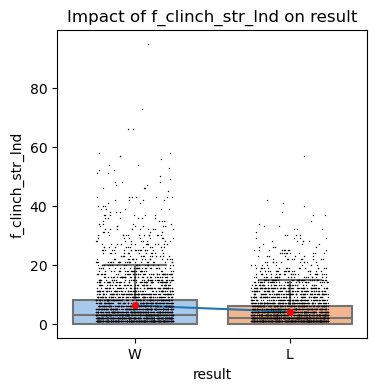

p_value = 8.450902703059282e-33
mean(W) = 6.1920185078079815 +- 8.812822886394434
mean(L) = 4.081179775280899 +- 5.631909964131643


8.450902703059282e-33

In [17]:
# Test Features significance
feature_significance(data=df,column='f_clinch_str_lnd',y='result',visualize=True)

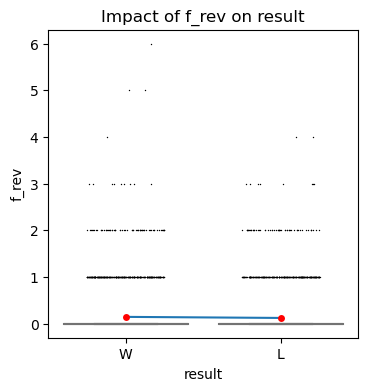

p_value = 0.024931911290954598
mean(W) = 0.14661654135338345 +- 0.4488483475280012
mean(L) = 0.12387640449438202 +- 0.39956806229922176


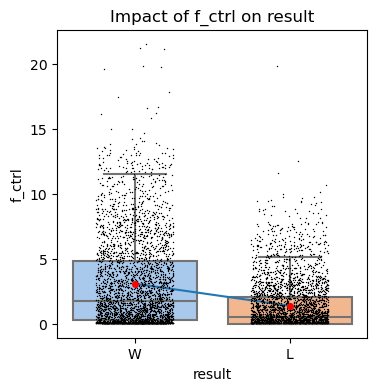

p_value = 2.3981934208689614e-139
mean(W) = 3.088360323886637 +- 3.444551065454059
mean(L) = 1.3832284349536392 +- 1.918906465809221


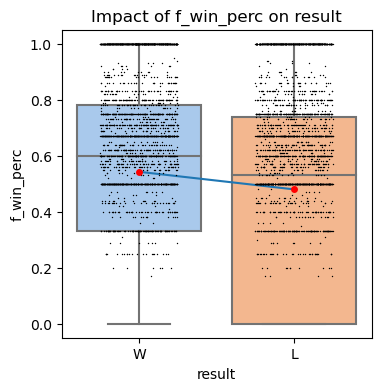

p_value = 2.7801077474433094e-14
mean(W) = 0.5426084441873913 +- 0.3433131668718092
mean(L) = 0.4798370786516844 +- 0.3461933868477055


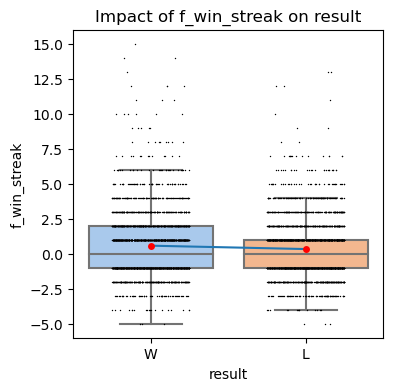

p_value = 2.42365116846647e-07
mean(W) = 0.5746096009253904 +- 2.0623067042612893
mean(L) = 0.33314606741573033 +- 1.847628966781215


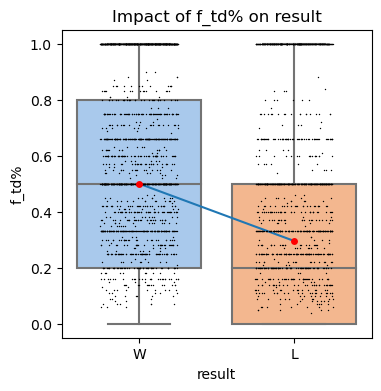

p_value = 2.016291786454519e-83
mean(W) = 0.5002834514380996 +- 0.35665974297716124
mean(L) = 0.2957039711191341 +- 0.34576936515999623


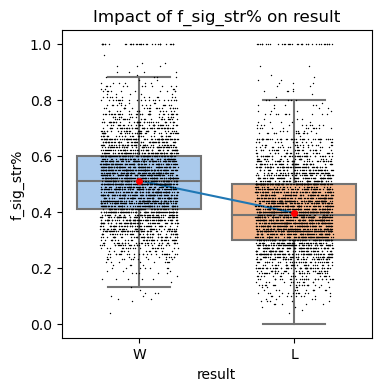

p_value = 5.185757409682483e-197
mean(W) = 0.5113478260869541 +- 0.14862717933575662
mean(L) = 0.3962306174231742 +- 0.16213032671407776


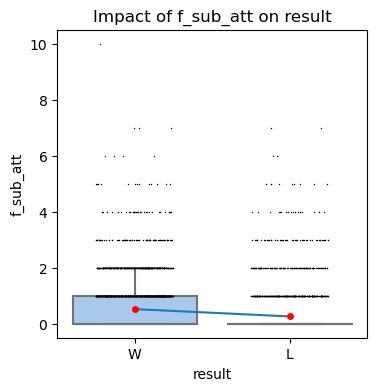

p_value = 3.790033031127201e-40
mean(W) = 0.521978021978022 +- 0.9203108947265981
mean(L) = 0.2598314606741573 +- 0.7147435893806748


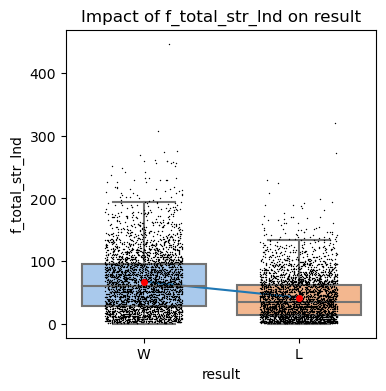

p_value = 3.678417623744973e-135
mean(W) = 67.21949103528051 +- 48.355986679475144
mean(L) = 41.843258426966294 +- 34.760490851167695


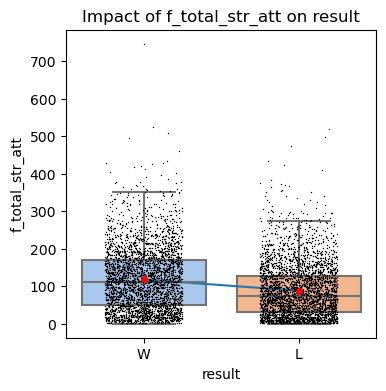

p_value = 1.8714383456185685e-60
mean(W) = 118.0320994794679 +- 82.1525394898896
mean(L) = 87.83314606741573 +- 70.28695375124997


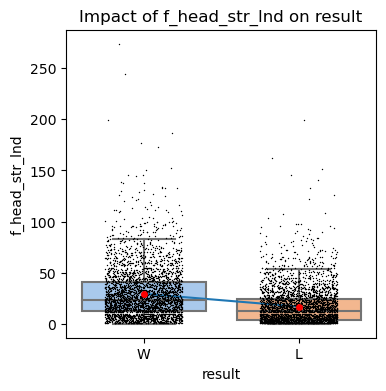

p_value = 3.9732540404390716e-127
mean(W) = 29.3235974551764 +- 24.624378249572867
mean(L) = 16.779213483146066 +- 17.841628995808964


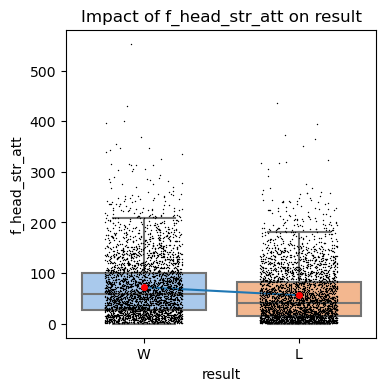

p_value = 1.3675404876817945e-31
mean(W) = 72.1041064198959 +- 59.744420285579196
mean(L) = 56.24129213483146 +- 53.214226074963676


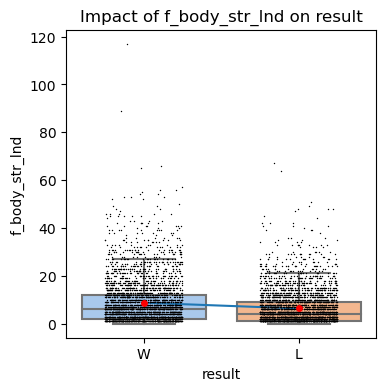

p_value = 1.2156222907933806e-31
mean(W) = 8.76923076923077 +- 9.697922212723105
mean(L) = 6.369943820224719 +- 7.245529113299868


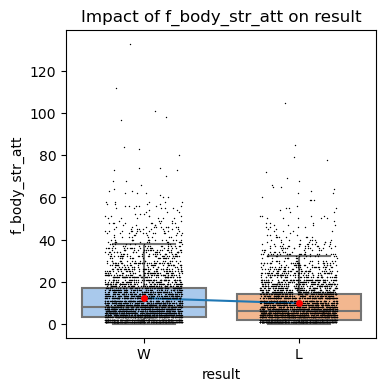

p_value = 1.9067995120969532e-17
mean(W) = 12.15268941584731 +- 12.99612190218152
mean(L) = 9.735112359550563 +- 10.685614751984343


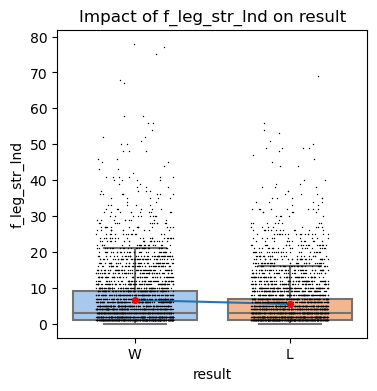

p_value = 6.08037367418877e-09
mean(W) = 6.596876807403123 +- 8.645616678912077
mean(L) = 5.48876404494382 +- 7.255365131509119


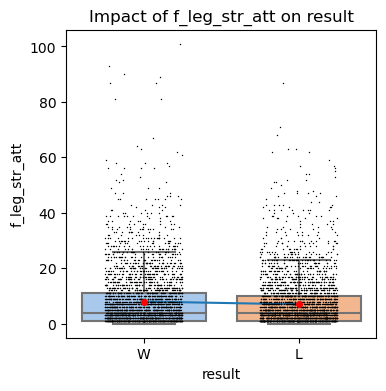

p_value = 1.6740618943280176e-05
mean(W) = 8.003470213996529 +- 10.530162114504147
mean(L) = 6.992977528089888 +- 9.085406628557426


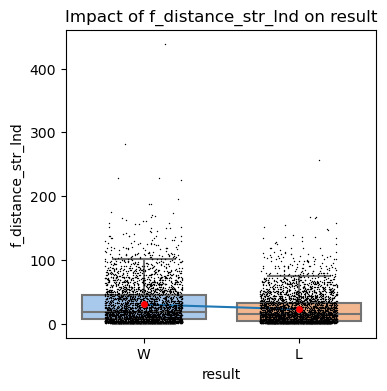

p_value = 4.709339995845873e-28
mean(W) = 30.20474262579526 +- 32.28849423709002
mean(L) = 22.704213483146066 +- 24.212063670624325


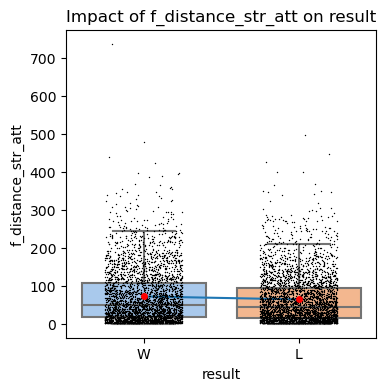

p_value = 9.227013512834871e-07
mean(W) = 71.83805668016194 +- 71.43022357319667
mean(L) = 63.95252808988764 +- 62.87973400599721


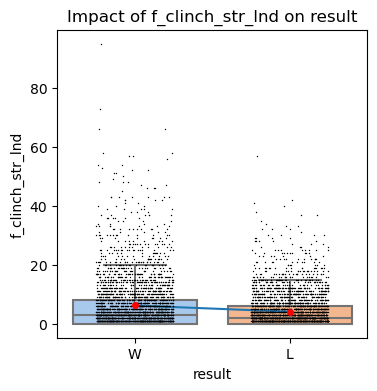

p_value = 8.450902703059282e-33
mean(W) = 6.1920185078079815 +- 8.812822886394434
mean(L) = 4.081179775280899 +- 5.631909964131643


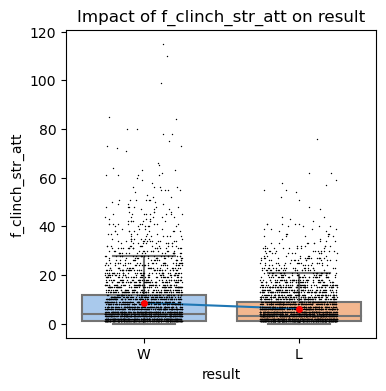

p_value = 1.9221675055172184e-24
mean(W) = 8.576923076923077 +- 11.698175999130628
mean(L) = 6.13061797752809 +- 8.019958646823293


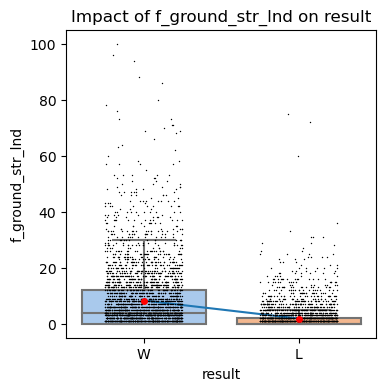

p_value = 3.3610239457519683e-199
mean(W) = 8.292943898207056 +- 11.543418273876549
mean(L) = 1.8525280898876404 +- 4.324206014253349


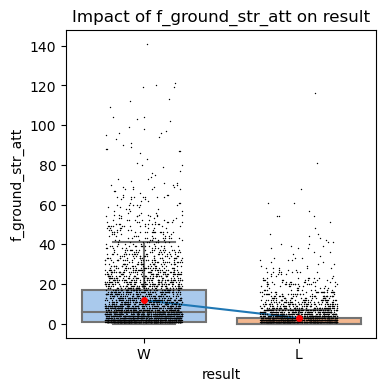

p_value = 3.6496155441391306e-187
mean(W) = 11.845286292654714 +- 16.449215782968555
mean(L) = 2.8862359550561796 +- 6.61002230107656


,p_value,significant
f_ground_str_lnd,3.361024e-199,True
f_sig_str%,5.185757e-197,True
f_ground_str_att,3.649616e-187,True
f_ctrl,2.398193e-139,True
f_total_str_lnd,3.678418e-135,True
f_head_str_lnd,3.973254e-127,True
f_td%,2.016292e-83,True
f_total_str_att,1.871438e-60,True
f_sub_att,3.790033e-40,True
f_clinch_str_lnd,8.450903e-33,True


In [18]:
# Test Numerical Features significance
NUMERICAL_COLUMNS = [item for item in df.columns if 'f_' in item and df[item].dtype in ['float64','int64']]
ALPHA = 0.05

features_dict = {}
for column in NUMERICAL_COLUMNS:
    p_value = feature_significance(data=df,column=column,y='result',visualize=True)
    features_dict.update({column:[p_value,p_value < ALPHA]})

feature_sig = pd.DataFrame(index=features_dict.keys(),
                           data=features_dict.values(),
                           columns=['p_value','significant']).sort_values(by='p_value')    
feature_sig

In [26]:
NUM_OF_FEATURES = 5
feature_sig.nsmallest(NUM_OF_FEATURES,'p_value')
SIGNIFICANT_FEATURES = [item[2:] for item in feature_sig.nsmallest(NUM_OF_FEATURES,'p_value').index]
print(f'{SIGNIFICANT_FEATURES}')

['ground_str_lnd', 'sig_str%', 'ground_str_att', 'ctrl', 'total_str_lnd']


In [27]:
# Creating required statistics for chosen features
print(f"Constructing statistics:['f_','o_']x{SIGNIFICANT_FEATURES}")
for stat in SIGNIFICANT_FEATURES:
    df[f'current_f_{stat}_mean'] = [get_current_stat_mean(fighter=df.loc[i,'fighter'],time=df.loc[i,'date'],stat=stat,data=df) for i in tqdm(df.index)]    
    df[f'current_o_{stat}_mean'] = [get_current_stat_mean(fighter=df.loc[i,'opponent'],time=df.loc[i,'date'],stat=stat,data=df) for i in tqdm(df.index)] 

beckup = df.copy()
df = df[['date','result','method','rounds','fighter','opponent','fight_time'] + [f'f_{col}' for col in SIGNIFICANT_FEATURES] + [f'o_{col}' for col in SIGNIFICANT_FEATURES]]
df.head(3)

Constructing statistics:['f_','o_']x['ground_str_lnd', 'sig_str%', 'ground_str_att', 'ctrl', 'total_str_lnd']


100%|██████████| 7018/7018 [03:16<00:00, 35.67it/s] 


,date,result,method,rounds,fighter,opponent,fight_time,f_ground_str_lnd,f_sig_str%,f_ground_str_att,f_ctrl,f_total_str_lnd,o_ground_str_lnd,o_sig_str%,o_ground_str_att,o_ctrl,o_total_str_lnd
0,2023-11-04,W,Decision - Unanimous,5,Jailton Almeida,Derrick Lewis,25.0,30,0.67,41,21.17,120,17,0.51,28,0.95,28
1,2023-11-04,L,Decision - Unanimous,3,Don'Tale Mayes,Rodrigo Nascimento,25.0,0,0.49,0,0.65,105,0,0.45,0,2.35,91
2,2023-11-04,W,Decision - Unanimous,3,Caio Borralho,Abus Magomedo,25.0,1,0.49,1,2.28,70,0,0.35,0,0.00,39


In [29]:
# beckup point
#df = beckup.copy()
#df.head(3)

,date,result,fighter,opponent,title,method,fight_time,rounds,f_rev,f_ctrl,f_win_perc,f_win_streak,o_rev,o_ctrl,o_win_perc,o_win_streak,f_td%,f_sig_str%,o_td%,o_sig_str%,f_sub_att,o_sub_att,f_total_str_lnd,f_total_str_att,f_head_str_lnd,f_head_str_att,f_body_str_lnd,f_body_str_att,f_leg_str_lnd,f_leg_str_att,f_distance_str_lnd,f_distance_str_att,f_clinch_str_lnd,f_clinch_str_att,f_ground_str_lnd,f_ground_str_att,o_total_str_lnd,o_total_str_att,o_head_str_lnd,o_head_str_att,o_body_str_lnd,o_body_str_att,o_leg_str_lnd,o_leg_str_att,o_distance_str_lnd,o_distance_str_att,o_clinch_str_lnd,o_clinch_str_att,o_ground_str_lnd,o_ground_str_att,current_f_ground_str_lnd_mean,current_o_ground_str_lnd_mean,current_f_sig_str%_mean,current_o_sig_str%_mean,current_f_ground_str_att_mean,current_o_ground_str_att_mean,current_f_ctrl_mean,current_o_ctrl_mean,current_f_total_str_lnd_mean,current_o_total_str_lnd_mean
0,2023-11-04,W,Jailton Almeida,Derrick Lewis,Heavyweight Bout,Decision - Unanimous,25.0,5,1,21.17,1.0,5,0,0.95,0.67,1,0.4,0.67,0.0,0.51,4,0,120,153,32,48,5,5,1,3,5,7,3,8,30,41,28,54,17,33,3,6,0,0,2,10,1,1,17,28,22.40,9.19,0.63,0.50,32.20,13.07,4.43,0.97,39.80,24.26
1,2023-11-04,L,Don'Tale Mayes,Rodrigo Nascimento,Heavyweight Bout,Decision - Unanimous,25.0,3,0,0.65,0.5,1,0,2.35,0.75,2,0.0,0.49,0.0,0.45,0,0,105,190,39,103,30,44,10,12,55,128,24,31,0,0,91,180,51,132,9,11,10,11,58,134,12,20,0,0,1.83,1.25,0.43,0.43,3.33,1.50,3.06,2.60,64.00,53.25
2,2023-11-04,W,Caio Borralho,Abus Magomedo,Middleweight Bout,Decision - Unanimous,25.0,3,0,2.28,1.0,4,0,0.00,0.50,-1,0.0,0.49,NaN,0.35,0,0,70,126,33,73,11,15,7,15,50,102,0,0,1,1,39,110,19,74,14,24,5,9,38,107,0,0,0,0,9.75,1.00,0.58,0.73,10.50,1.00,7.13,0.21,55.25,27.00


In [32]:
# Feature differencial columns (=final features) 
FEATURES = list(set([col[10:] for col in df.columns if 'current_' in col and '_mean' in col]))

for feature in FEATURES:
    df[f'{feature}_dif'] = df[f'current_f_{feature}'] - df[f'current_o_{feature}']

df = df[['date','result','method','rounds','fighter','opponent','fight_time'] + [col for col in df.columns if '_dif' in col]]
df.head(3)

,date,result,method,rounds,fighter,opponent,fight_time,ground_str_lnd_mean_dif,ground_str_att_mean_dif,sig_str%_mean_dif,total_str_lnd_mean_dif,ctrl_mean_dif
0,2023-11-04,W,Decision - Unanimous,5,Jailton Almeida,Derrick Lewis,25.0,13.21,19.13,0.13,15.54,3.46
1,2023-11-04,L,Decision - Unanimous,3,Don'Tale Mayes,Rodrigo Nascimento,25.0,0.58,1.83,0.00,10.75,0.46
2,2023-11-04,W,Decision - Unanimous,3,Caio Borralho,Abus Magomedo,25.0,8.75,9.50,-0.15,28.25,6.92


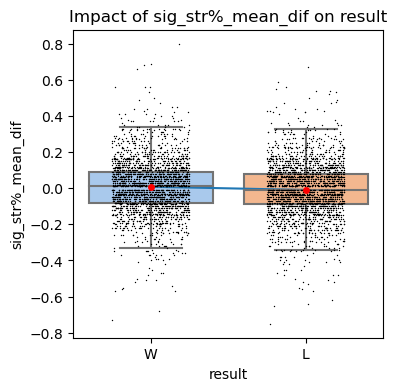

p_value = 1.4764691407317275e-05
mean(W) = 0.008332679482149873 +- 0.14665167561768516
mean(L) = -0.009448064392487528 +- 0.14774529429555286


1.4764691407317275e-05

In [37]:
# Visualize STAT effect:
feature_significance(data=df,column='sig_str%_mean_dif',y='result',visualize=True)

In [38]:
# Normalize features:
FEATURES = list(df.columns[list(df.columns).index('fight_time')+1:])

for feature in tqdm(FEATURES):
    mean = df[feature].mean()
    std = df[feature].std()
    df[feature] = (df[feature] - mean)/std

df.describe()

100%|██████████| 5/5 [00:00<00:00, 1111.37it/s]


,rounds,fight_time,ground_str_lnd_mean_dif,ground_str_att_mean_dif,sig_str%_mean_dif,total_str_lnd_mean_dif,ctrl_mean_dif
count,7018.000000,7018.000000,5.169000e+03,5.169000e+03,5.158000e+03,5.169000e+03,5.169000e+03
mean,3.179538,17.840678,-7.861126e-18,1.469129e-17,-1.070834e-17,-1.718279e-19,-3.677117e-17
std,0.571742,8.416863,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,3.000000,0.080000,-6.612232e+00,-1.137902e+01,-5.080665e+00,-4.876700e+00,-6.585429e+00
25%,3.000000,10.530000,-4.393869e-01,-4.516433e-01,-6.057353e-01,-6.169968e-01,-5.620958e-01
50%,3.000000,20.830000,6.076163e-03,6.349043e-03,4.482449e-03,-7.688519e-03,-2.571753e-03
75%,3.000000,25.000000,4.744487e-01,4.789491e-01,6.147002e-01,6.008015e-01,5.719731e-01
max,5.000000,25.000000,6.920935e+00,6.976770e+00,5.428640e+00,4.360293e+00,4.075570e+00


In [39]:
df.to_csv('data_features_ready.csv',index=None)
print('data_features_ready.csv saved.')
pd.read_csv('data_features_ready.csv').head(3)

data_features_ready.csv saved.


,date,result,method,rounds,fighter,opponent,fight_time,ground_str_lnd_mean_dif,ground_str_att_mean_dif,sig_str%_mean_dif,total_str_lnd_mean_dif,ctrl_mean_dif
0,2023-11-04,W,Decision - Unanimous,5,Jailton Almeida,Derrick Lewis,25.0,1.687381,1.650138,0.885908,0.420246,1.300481
1,2023-11-04,L,Decision - Unanimous,3,Don'Tale Mayes,Rodrigo Nascimento,25.0,0.079896,0.163596,0.004482,0.289602,0.173922
2,2023-11-04,W,Decision - Unanimous,3,Caio Borralho,Abus Magomedo,25.0,1.119734,0.822658,-1.012547,0.766902,2.599778
